# Otimizadores: (adam, sgd, adgrad, rmsprop, momentum)

In [ ]:
#importando as bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# Definindo a arquitetura da rede neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Função de treinamento
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Função de avaliação
def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss / len(data_loader)

In [ ]:
# Função para treinar o modelo com um otimizador específico
def run_training(optimizer_name):
    # Hiperparâmetros
    batch_size = 64
    learning_rate = 0.001
    epochs = 15

    # Dataset e DataLoader
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    valid_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

    # Defina o tamanho do conjunto de validação
    validation_size = 0.2  # 20% dos dados serão usados para validação

    # Obtenha o número total de exemplos no conjunto de treinamento
    total_size = len(train_dataset)

    # Calcule o tamanho do conjunto de validação com base na porcentagem
    validation_size = int(validation_size * total_size)

    # Calcule o tamanho do conjunto de treinamento
    train_size = total_size - validation_size

    # Use random_split para dividir aleatoriamente o conjunto de treinamento
    train_dataset, valid_dataset = random_split(train_dataset, [train_size, validation_size])

    # Defina o DataLoader para o conjunto de treinamento e validação
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # Modelo, otimizador e função de perda
    model = SimpleNN()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = None

    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)

    criterion = nn.CrossEntropyLoss()

    # Treinamento e avaliação
    train_losses = []
    valid_losses = []

    for epoch in range(epochs):
        train_loss = train(model, train_loader, optimizer, criterion, device)
        valid_loss = evaluate(model, valid_loader, criterion, device)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

    # Plotando os resultados
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Optimizer: {optimizer_name}')
    plt.legend()
    plt.show()

Epoch 1/15, Train Loss: 0.4192, Valid Loss: 0.2826
Epoch 2/15, Train Loss: 0.2294, Valid Loss: 0.1874
Epoch 3/15, Train Loss: 0.1654, Valid Loss: 0.1489
Epoch 4/15, Train Loss: 0.1315, Valid Loss: 0.1296
Epoch 5/15, Train Loss: 0.1090, Valid Loss: 0.1172
Epoch 6/15, Train Loss: 0.0965, Valid Loss: 0.1165
Epoch 7/15, Train Loss: 0.0844, Valid Loss: 0.1244
Epoch 8/15, Train Loss: 0.0758, Valid Loss: 0.1079
Epoch 9/15, Train Loss: 0.0676, Valid Loss: 0.0913
Epoch 10/15, Train Loss: 0.0618, Valid Loss: 0.0888
Epoch 11/15, Train Loss: 0.0566, Valid Loss: 0.1026
Epoch 12/15, Train Loss: 0.0523, Valid Loss: 0.1217
Epoch 13/15, Train Loss: 0.0479, Valid Loss: 0.1127
Epoch 14/15, Train Loss: 0.0436, Valid Loss: 0.0996
Epoch 15/15, Train Loss: 0.0424, Valid Loss: 0.0956


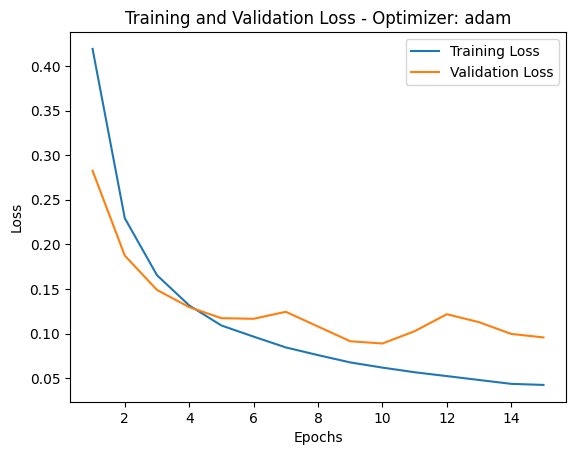

Epoch 1/15, Train Loss: 1.9839, Valid Loss: 1.6779
Epoch 2/15, Train Loss: 1.3883, Valid Loss: 1.1558
Epoch 3/15, Train Loss: 0.9824, Valid Loss: 0.8672
Epoch 4/15, Train Loss: 0.7671, Valid Loss: 0.7151
Epoch 5/15, Train Loss: 0.6490, Valid Loss: 0.6265
Epoch 6/15, Train Loss: 0.5763, Valid Loss: 0.5688
Epoch 7/15, Train Loss: 0.5271, Valid Loss: 0.5291
Epoch 8/15, Train Loss: 0.4916, Valid Loss: 0.4993
Epoch 9/15, Train Loss: 0.4651, Valid Loss: 0.4763
Epoch 10/15, Train Loss: 0.4440, Valid Loss: 0.4577
Epoch 11/15, Train Loss: 0.4271, Valid Loss: 0.4428
Epoch 12/15, Train Loss: 0.4132, Valid Loss: 0.4309
Epoch 13/15, Train Loss: 0.4014, Valid Loss: 0.4211
Epoch 14/15, Train Loss: 0.3915, Valid Loss: 0.4113
Epoch 15/15, Train Loss: 0.3827, Valid Loss: 0.4037


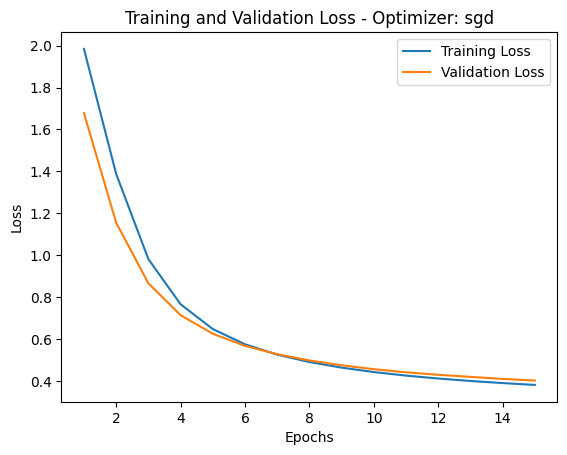

Epoch 1/15, Train Loss: 0.8374, Valid Loss: 0.4320
Epoch 2/15, Train Loss: 0.3881, Valid Loss: 0.3556
Epoch 3/15, Train Loss: 0.3369, Valid Loss: 0.3223
Epoch 4/15, Train Loss: 0.3104, Valid Loss: 0.3035
Epoch 5/15, Train Loss: 0.2901, Valid Loss: 0.2893
Epoch 6/15, Train Loss: 0.2718, Valid Loss: 0.2703
Epoch 7/15, Train Loss: 0.2571, Valid Loss: 0.2567
Epoch 8/15, Train Loss: 0.2430, Valid Loss: 0.2464
Epoch 9/15, Train Loss: 0.2302, Valid Loss: 0.2344
Epoch 10/15, Train Loss: 0.2189, Valid Loss: 0.2278
Epoch 11/15, Train Loss: 0.2079, Valid Loss: 0.2177
Epoch 12/15, Train Loss: 0.1979, Valid Loss: 0.2060
Epoch 13/15, Train Loss: 0.1891, Valid Loss: 0.1999
Epoch 14/15, Train Loss: 0.1801, Valid Loss: 0.1922
Epoch 15/15, Train Loss: 0.1736, Valid Loss: 0.1856


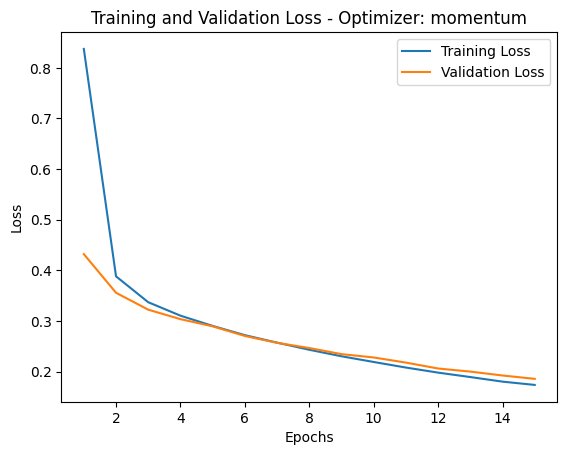

Epoch 1/15, Train Loss: 0.4117, Valid Loss: 0.2673
Epoch 2/15, Train Loss: 0.2164, Valid Loss: 0.1925
Epoch 3/15, Train Loss: 0.1586, Valid Loss: 0.1762
Epoch 4/15, Train Loss: 0.1269, Valid Loss: 0.1318
Epoch 5/15, Train Loss: 0.1085, Valid Loss: 0.1195
Epoch 6/15, Train Loss: 0.0929, Valid Loss: 0.1389
Epoch 7/15, Train Loss: 0.0842, Valid Loss: 0.1143
Epoch 8/15, Train Loss: 0.0760, Valid Loss: 0.1115
Epoch 9/15, Train Loss: 0.0693, Valid Loss: 0.1037
Epoch 10/15, Train Loss: 0.0634, Valid Loss: 0.1168
Epoch 11/15, Train Loss: 0.0591, Valid Loss: 0.1066
Epoch 12/15, Train Loss: 0.0541, Valid Loss: 0.1106
Epoch 13/15, Train Loss: 0.0498, Valid Loss: 0.1166
Epoch 14/15, Train Loss: 0.0475, Valid Loss: 0.1088
Epoch 15/15, Train Loss: 0.0432, Valid Loss: 0.1121


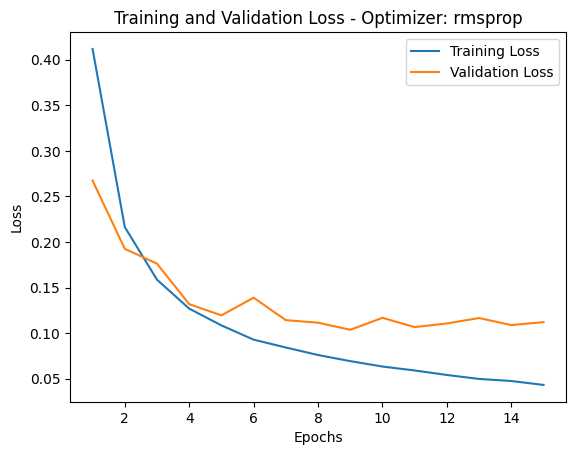

Epoch 1/15, Train Loss: 0.7471, Valid Loss: 0.5001
Epoch 2/15, Train Loss: 0.4641, Valid Loss: 0.4178
Epoch 3/15, Train Loss: 0.4122, Valid Loss: 0.3839
Epoch 4/15, Train Loss: 0.3855, Valid Loss: 0.3639
Epoch 5/15, Train Loss: 0.3682, Valid Loss: 0.3490
Epoch 6/15, Train Loss: 0.3555, Valid Loss: 0.3386
Epoch 7/15, Train Loss: 0.3452, Valid Loss: 0.3304
Epoch 8/15, Train Loss: 0.3374, Valid Loss: 0.3225
Epoch 9/15, Train Loss: 0.3306, Valid Loss: 0.3167
Epoch 10/15, Train Loss: 0.3249, Valid Loss: 0.3118
Epoch 11/15, Train Loss: 0.3197, Valid Loss: 0.3067
Epoch 12/15, Train Loss: 0.3150, Valid Loss: 0.3025
Epoch 13/15, Train Loss: 0.3107, Valid Loss: 0.2995
Epoch 14/15, Train Loss: 0.3068, Valid Loss: 0.2955
Epoch 15/15, Train Loss: 0.3032, Valid Loss: 0.2929


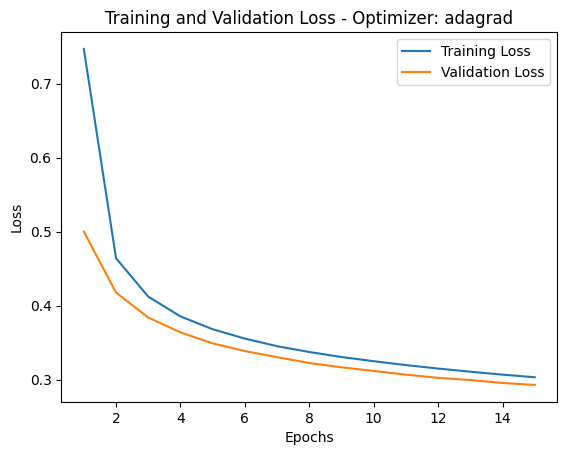

In [ ]:
# Executando o treinamento com diferentes otimizadores
optimizers = ['adam', 'sgd', 'momentum', 'rmsprop', 'adagrad']

for optimizer in optimizers:
    run_training(optimizer)